In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.stats import norm,beta

In [2]:
print(np.random.rand(5))

[0.1320351  0.48523879 0.2785301  0.41740198 0.06415784]


8000096
[0.94387384 0.93501985 0.61504664 0.37177378]


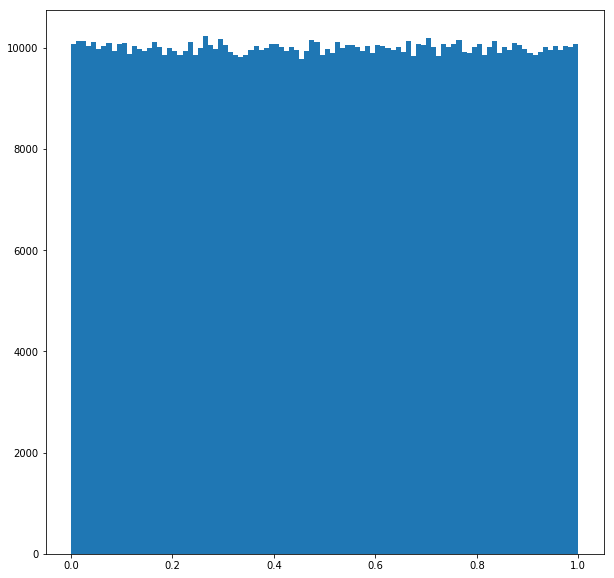

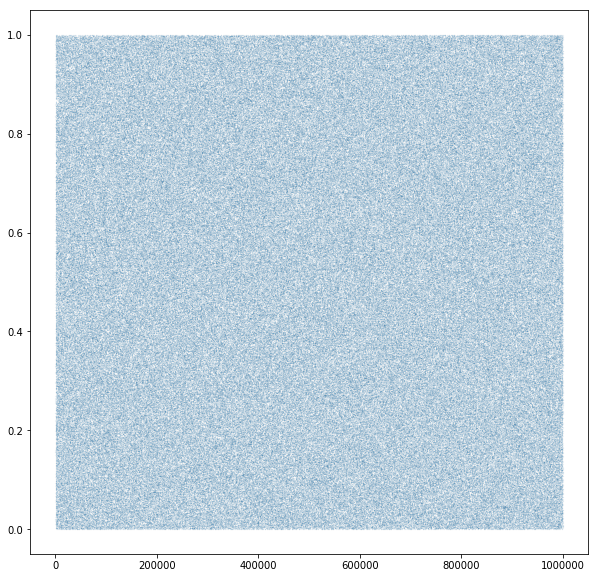

In [3]:
x=np.random.rand(1000000)
print(sys.getsizeof(x)) #8バイト
print(x[1:5])
plt.figure(figsize=(10,10))
plt.hist(x,bins=100)
plt.plot()
plt.figure(figsize=(10,10))
plt.plot(x,'.',alpha=0.5,markersize=0.1)
plt.show()

In [4]:
print(np.mean(x))
print(np.var(x))#理論値 1/12~0.833
print(np.sqrt(np.var(x)/x.shape))#標準誤差.仕様上配列になっているが[0]をつけて数値にしても良い

0.4997850607397035
0.08342364790758089
[0.00028883]


In [5]:
y=1/(2+np.cos(10*x))#単純に積分するのはちょっと難しそうな関数を考える

0.5984373536588794
[0.00023714]


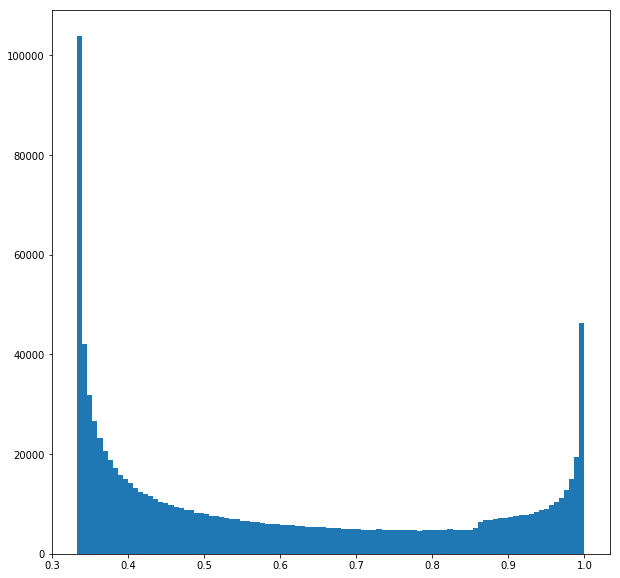

In [6]:
plt.figure(figsize=(10,10))
plt.hist(y,bins=100)
plt.plot()
print(np.mean(y))
print(np.sqrt(np.var(y)/y.shape))#標準誤差

In [7]:
#1000個でやる
x=np.random.rand(1000)
y=1/(2+np.cos(10*x))
print(np.sqrt(np.var(y)/y.shape))#同じく標準誤差
#一桁でかい

[0.00771277]


In [8]:
#1000個*10000セットでyのブレをだす
yy=np.empty(10000)
for i in range(10000):
    x=np.random.rand(1000)
    yy[i]=np.mean(1/(2+np.cos(10*x)))
yy[0:5]#最初の５個

array([0.59933196, 0.59954023, 0.61017587, 0.59888243, 0.60043142])

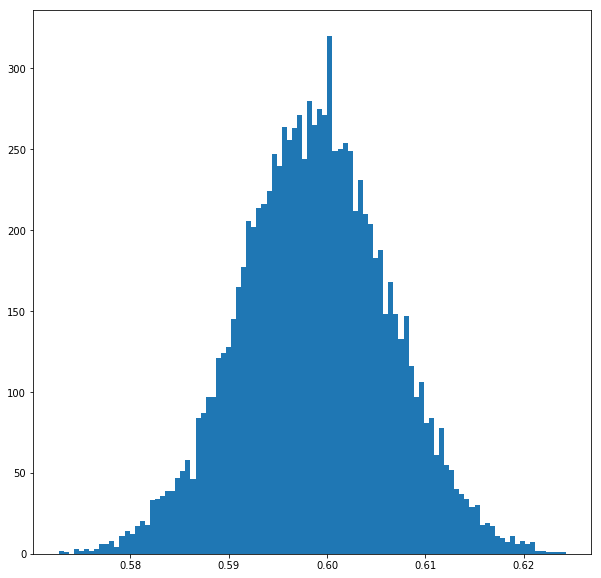

In [9]:
plt.figure(figsize=(10,10))
plt.hist(yy,bins=100)
plt.show()

In [10]:
yymean=np.mean(yy)
yyvar=np.var(yy)
yymax=np.max(yy)
yymin=np.min(yy)
np.sqrt(yyvar/y.shape)#「yたち」の標準誤差

array([0.00023757])

In [11]:
print(np.mean(yy),"±",np.sqrt(yyvar/y.shape)[0])
print("すなわち")
print(np.mean(yy)-np.sqrt(yyvar/y.shape)[0], "-", np.mean(yy)+np.sqrt(yyvar/y.shape)[0])

0.5987610575859864 ± 0.00023756724798295884
すなわち
0.5985234903380034 - 0.5989986248339694


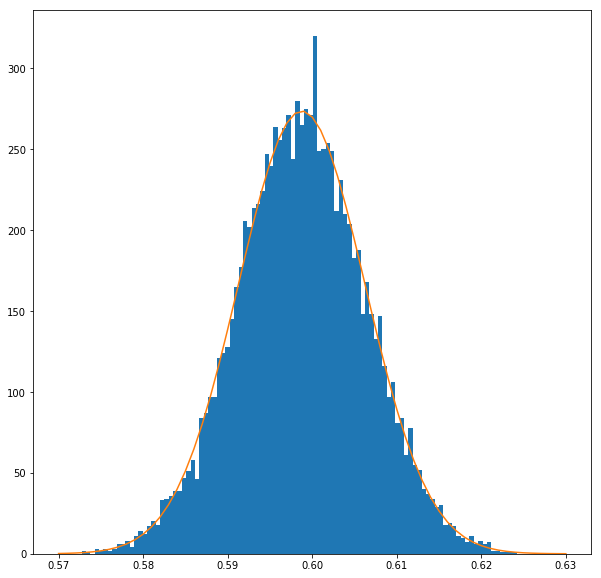

In [12]:
#正規分布のグラフを重ねる
plt.figure(figsize=(10,10))
plt.hist(yy,bins=100)
x=np.linspace(0.57,0.63,61)#0.01刻み
plt.plot(x,norm.pdf(x,yymean,np.sqrt(yyvar))*100*(yymax-yymin))
plt.show()

histのグラフの総面積は$10000*((max\ of\ yy)-(min\ of\ yy))*0.01$であり、一方norm.pdf(x)の面積は（確率密度なので）1である。これらの面積が同じになるように調整することに注意

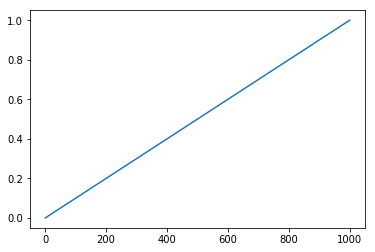

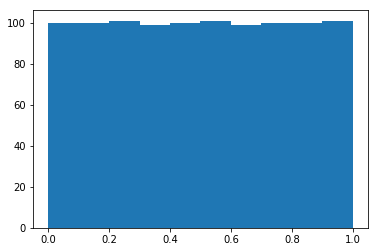

0.5988118202806453

In [13]:
#簡単な問題の場合は規則的な数列の方が良い結果を出す
x=np.linspace(0,1,1001)
plt.plot(x)
plt.show()
plt.hist(x)
plt.show()
y=1/(2+np.cos(10*x))
np.mean(y)
#理論値 0.598814. In[11]と比較せよ.

In [14]:
#モンテカルロ法が便利なケース
#配列に一括で条件別処理をするときはnp.whereが便利
x=np.random.rand(10,10000)
y=np.where(np.sort(x)[3]>0.5,1,0)
print(y[0:10])
print(np.mean(y))

[0 0 0 0 0 0 0 0 0 0]
0.5006


0.978405700935043
0.9772498680518208
0.002162354331988356


[]

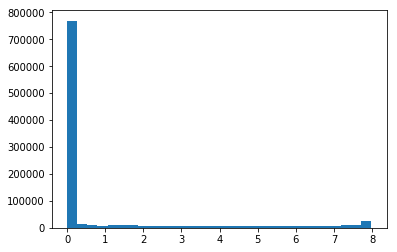

In [15]:
#一様分布によるモンテカルロ法で正規分布の下側確率を計算
x = (np.random.rand(1000000)-0.5)*20
y = np.where(x<2,norm.pdf(x)/(1/20),0)
print(np.mean(y))
print(norm.cdf(2))#理論値
print(np.sqrt(np.var(y)/y.shape[0]))#標準誤差
plt.hist(y,bins=30)
plt.plot()

0.977135
0.9772498680518208
0.0001494730469850668


[]

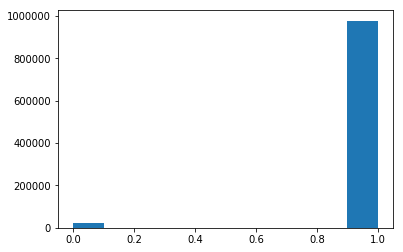

In [16]:
#正規分布を素直に直接出して正規分布の下側確率を計算
x = np.random.randn(1000000)
y = np.where(x<2,1,0)
print(np.mean(y))
print(norm.cdf(2))#理論値
print(np.sqrt(np.var(y)/y.shape[0]))#標準誤差
plt.hist(y)#yは0か1である
plt.plot()

この方法はnp.random.randnを使っているのでずるい
→一様分布から正規分布を生成したい

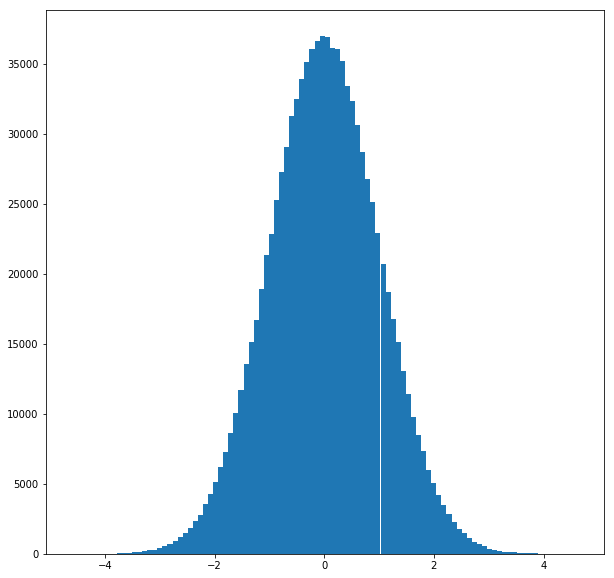

In [17]:
#逆関数法
u = np.random.rand(1000000)
x = norm.isf(u)
plt.figure(figsize=(10,10))
plt.hist(x,bins=100)
plt.show()
#悪くない

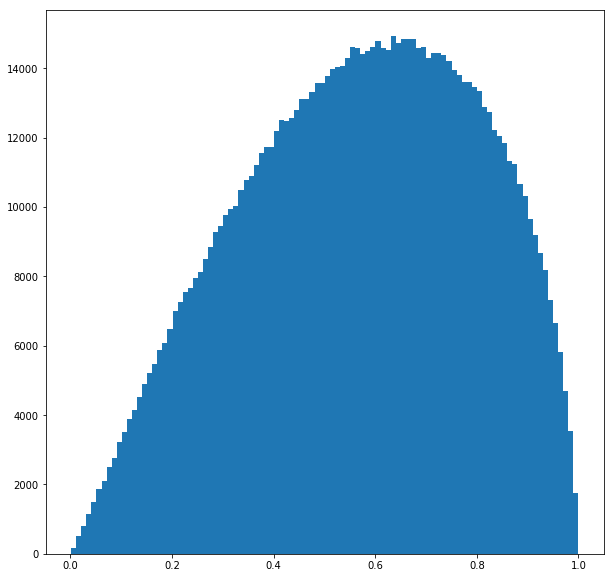

In [18]:
#ベータ関数もいってみよう
#A, Bをいじってみよう
A=2.1
B=1.6
x = beta.isf(u,A,B)
plt.figure(figsize=(10,10))
plt.hist(x,bins=100)
plt.show()

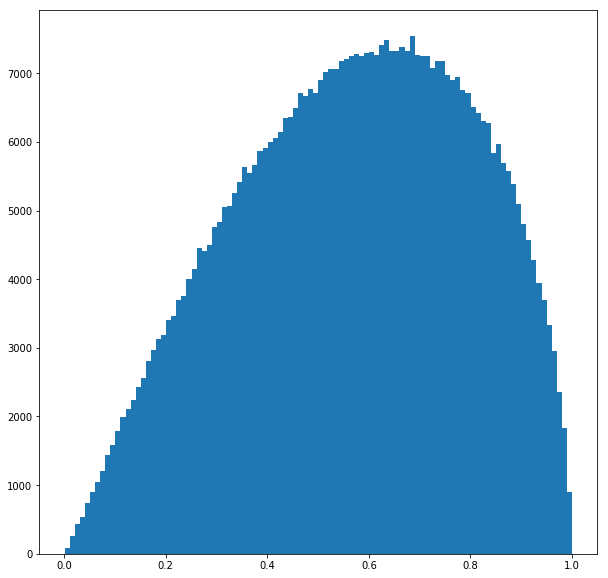

In [19]:
#棄却法によるベータ分布生成
u = np.random.rand(1000000)
v = np.random.rand(1000000)
y = beta.pdf(v, A, B)
x = np.where(2*u < y)  # 代入値を書かない場合、xには添え字が返される
x = v[x]

plt.figure(figsize=(10,10))
plt.hist(x, bins=100)
plt.show()